In [1]:
# Enable outputting results interactively. 
# All the results from code in a given cell will be displayed instead of only the last one.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [29]:
import pandas as pd
import pickle
import numpy as np
import scipy.stats as stats
import sqlite3
import math
import datetime
import matplotlib.dates as mdates

import statsmodels.api as sm

from re import sub
from decimal import Decimal

import re
import calendar 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
listings_short_avail =  pickle.load( open( "../data/listings_short_avail.p", "rb" ) )

In [14]:
private_room = listings_short_avail[listings_short_avail['room_type'] == 'Private room']
private_room.shape

(84450, 111)

In [15]:
PR_p = np.asarray(private_room['price_float'])

PR_1pct = np.percentile(PR_p, 1)
PR_99pct = np.percentile(PR_p, 99)

PR_1pct, PR_99pct

private_room = private_room[private_room['price_float'] <= PR_99pct ]
private_room = private_room[private_room['price_float'] >= PR_1pct ]
private_room.shape

(48.0, 500.0)

(82974, 111)

In [21]:
median_p = private_room.groupby(['file_scraped_dt', 'room_type', 'neighbourhood_cleansed'])['price_float'].median().reset_index(name='median_price')

C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'file_scraped_dt' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [22]:
median_p.head()

,file_scraped_dt,room_type,neighbourhood_cleansed,median_price
0,2015-05-04,Private room,Bayview,99.0
1,2015-05-04,Private room,Bernal Heights,105.0
2,2015-05-04,Private room,Castro/Upper Market,125.0
3,2015-05-04,Private room,Chinatown,125.0
4,2015-05-04,Private room,Crocker Amazon,60.0


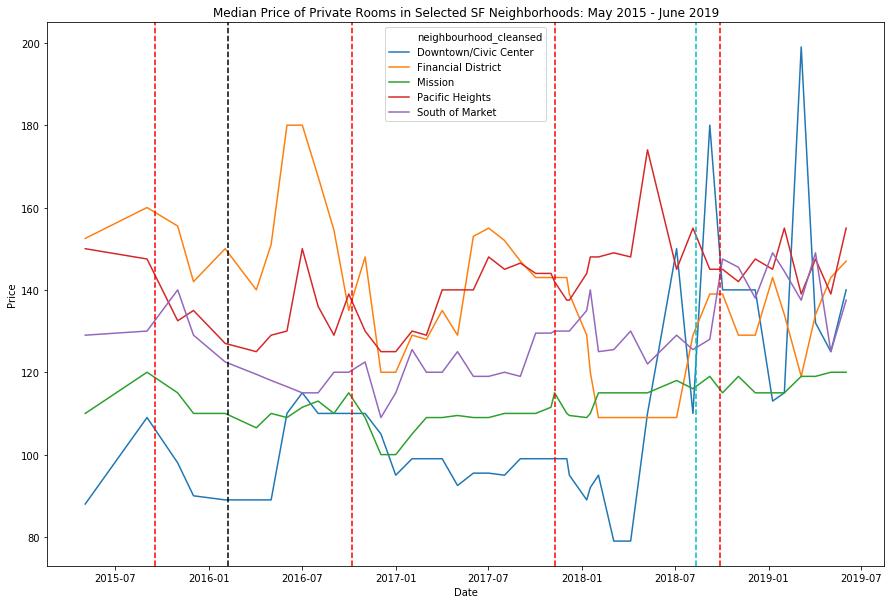

In [25]:
lst = ['Mission', 'South of Market', 'Financial District', 'Downtown/Civic Center', 'Pacific Heights']

for_chart = median_p[median_p['neighbourhood_cleansed'].isin(lst)]

fig, ax = plt.subplots(1,1,figsize = (15,10))

sns.lineplot(x= 'file_scraped_dt', y='median_price', hue = 'neighbourhood_cleansed', data = for_chart)

# Dreamforce dates 2015 - 2018

plt.axvline(x= datetime.date(2015,9,18), color = 'red', linestyle='--')
plt.axvline(x= datetime.date(2016,10,7), color = 'red', linestyle='--')
plt.axvline(x= datetime.date(2017,11,9), color = 'red', linestyle='--')
plt.axvline(x= datetime.date(2018,9,28), color = 'red', linestyle='--')

# Outside Lands Festival
plt.axvline(x= datetime.date(2018,8,12), color = 'c', linestyle='--')

# Superbowl in 2016
plt.axvline(x= datetime.date(2016,2,7), color = 'black', linestyle='--')

plt.title("Median Price of Private Rooms in Selected SF Neighborhoods: May 2015 - June 2019")
plt.xlabel("Date")
plt.ylabel("Price");

In [26]:
avg_price = private_room.groupby(['file_scraped_dt', 'room_type', 'neighbourhood_cleansed'])['price_float'].mean().reset_index(name='average_price')

C:\Users\ksher\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'file_scraped_dt' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


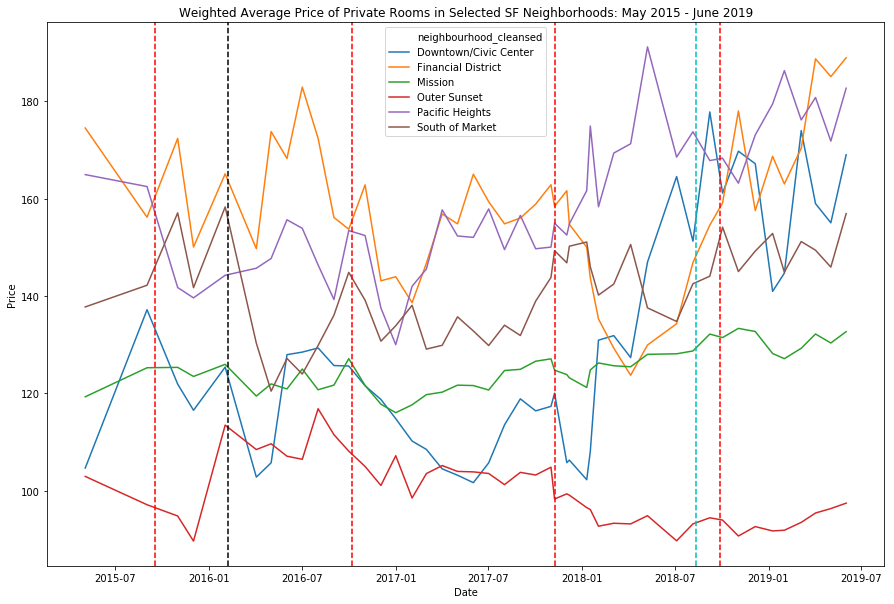

In [59]:
lst = ['Mission', 'South of Market', 'Financial District', 'Downtown/Civic Center', 'Pacific Heights', 'Outer Sunset']

for_chart = avg_price[avg_price['neighbourhood_cleansed'].isin(lst)]

fig, ax = plt.subplots(1,1,figsize = (15,10))

sns.lineplot(x= 'file_scraped_dt', y='average_price', hue = 'neighbourhood_cleansed', data = for_chart)

# Dreamforce dates 2015 - 2018

plt.axvline(x= datetime.date(2015,9,18), color = 'red', linestyle='--')
plt.axvline(x= datetime.date(2016,10,7), color = 'red', linestyle='--')
plt.axvline(x= datetime.date(2017,11,9), color = 'red', linestyle='--')
plt.axvline(x= datetime.date(2018,9,28), color = 'red', linestyle='--')

# Outside Lands Festival
plt.axvline(x= datetime.date(2018,8,12), color = 'c', linestyle='--')

# Superbowl in 2016
plt.axvline(x= datetime.date(2016,2,7), color = 'black', linestyle='--')

plt.title("Weighted Average Price of Private Rooms in Selected SF Neighborhoods: May 2015 - June 2019")
plt.xlabel("Date")
plt.ylabel("Price");

In [41]:
avg_price = avg_price.set_index(pd.DatetimeIndex(avg_price['file_scraped_dt']))



Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in SOMA: May 2015 - June 2019')

Text(0, 0.5, 'Average_price')

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in SOMA: May 2015 - June 2019')

Text(0, 0.5, 'Trend')

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in SOMA: May 2015 - June 2019')

Text(0, 0.5, 'Seasonal')

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in SOMA: May 2015 - June 2019')

Text(0, 0.5, 'Resid')

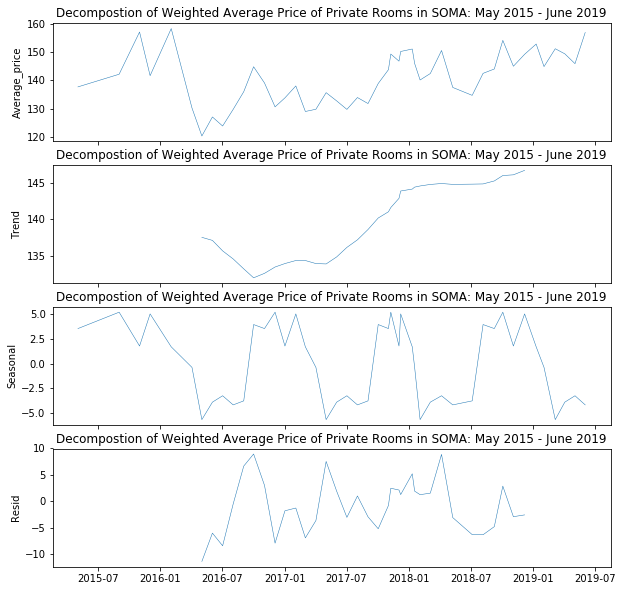

In [44]:
p_sub = avg_price[avg_price['neighbourhood_cleansed'] == 'South of Market']

decomposition = sm.tsa.seasonal_decompose(p_sub.dropna()['average_price'].values, model='additive', freq= 12)  
price_decomp = p_sub.dropna().copy()
price_decomp['trend'] = decomposition.trend
price_decomp['seasonal'] = decomposition.seasonal
price_decomp['resid'] = decomposition.resid

fig, axs = plt.subplots(4,1, figsize=(10,10), sharex=True)
columns = ['average_price','trend','seasonal','resid']

for i, ax in enumerate(axs):
    ax.set_title('Decompostion of Weighted Average Price of Private Rooms in SOMA: May 2015 - June 2019')
    ax.plot(price_decomp.index, price_decomp[columns[i]].values, lw=.5)
    ax.set_ylabel(columns[i].capitalize(), size=10)

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in Pacific Heights: May 2015 - June 2019')

Text(0, 0.5, 'Average_price')

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in Pacific Heights: May 2015 - June 2019')

Text(0, 0.5, 'Trend')

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in Pacific Heights: May 2015 - June 2019')

Text(0, 0.5, 'Seasonal')

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in Pacific Heights: May 2015 - June 2019')

Text(0, 0.5, 'Resid')

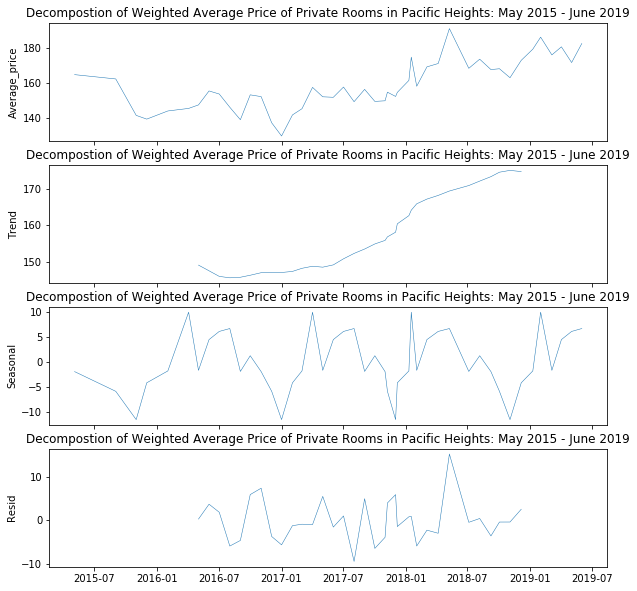

In [57]:
p_sub = avg_price[avg_price['neighbourhood_cleansed'] == 'Pacific Heights']

decomposition = sm.tsa.seasonal_decompose(p_sub.dropna()['average_price'].values, model='additive', freq= 12)  
price_decomp = p_sub.dropna().copy()
price_decomp['trend'] = decomposition.trend
price_decomp['seasonal'] = decomposition.seasonal
price_decomp['resid'] = decomposition.resid

fig, axs = plt.subplots(4,1, figsize=(10,10), sharex=True)
columns = ['average_price','trend','seasonal','resid']

for i, ax in enumerate(axs):
    ax.set_title('Decompostion of Weighted Average Price of Private Rooms in Pacific Heights: May 2015 - June 2019')
    ax.plot(price_decomp.index, price_decomp[columns[i]].values, lw=.5)
    ax.set_ylabel(columns[i].capitalize(), size=10)

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in Downtown/Civic Center: May 2015 - June 2019')

Text(0, 0.5, 'Average_price')

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in Downtown/Civic Center: May 2015 - June 2019')

Text(0, 0.5, 'Trend')

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in Downtown/Civic Center: May 2015 - June 2019')

Text(0, 0.5, 'Seasonal')

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in Downtown/Civic Center: May 2015 - June 2019')

Text(0, 0.5, 'Resid')

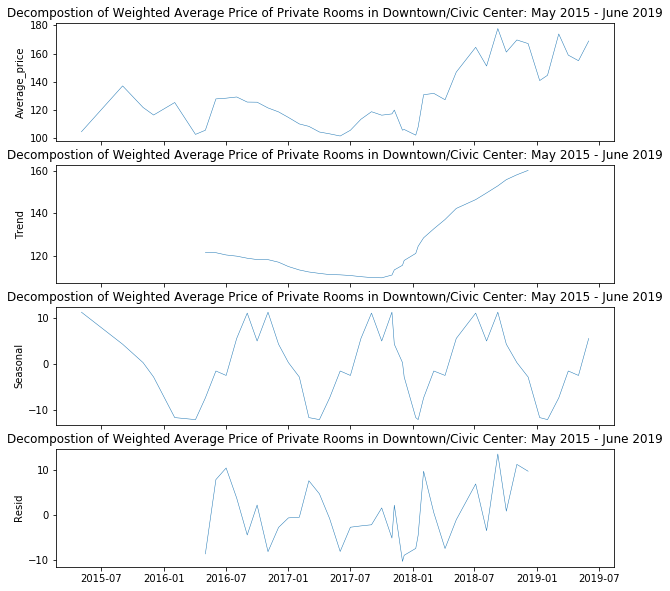

In [51]:
p_sub = avg_price[avg_price['neighbourhood_cleansed'] == 'Downtown/Civic Center']

decomposition = sm.tsa.seasonal_decompose(p_sub.dropna()['average_price'].values, model='additive', freq= 12)  
price_decomp = p_sub.dropna().copy()
price_decomp['trend'] = decomposition.trend
price_decomp['seasonal'] = decomposition.seasonal
price_decomp['resid'] = decomposition.resid

fig, axs = plt.subplots(4,1, figsize=(10,10), sharex=True)
columns = ['average_price','trend','seasonal','resid']

for i, ax in enumerate(axs):
    ax.set_title('Decompostion of Weighted Average Price of Private Rooms in Downtown/Civic Center: May 2015 - June 2019')
    ax.plot(price_decomp.index, price_decomp[columns[i]].values, lw=.5)
    ax.set_ylabel(columns[i].capitalize(), size=10)

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in Outer Sunset: May 2015 - June 2019')

Text(0, 0.5, 'Average_price')

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in Outer Sunset: May 2015 - June 2019')

Text(0, 0.5, 'Trend')

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in Outer Sunset: May 2015 - June 2019')

Text(0, 0.5, 'Seasonal')

Text(0.5, 1.0, 'Decompostion of Weighted Average Price of Private Rooms in Outer Sunset: May 2015 - June 2019')

Text(0, 0.5, 'Resid')

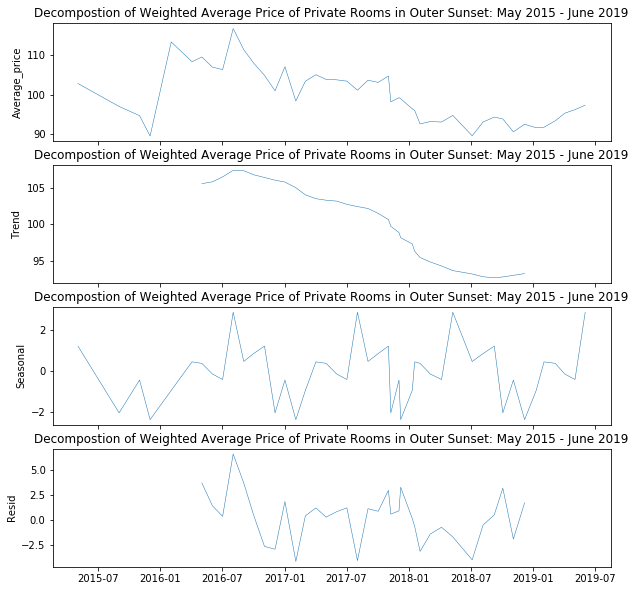

In [52]:
p_sub = avg_price[avg_price['neighbourhood_cleansed'] == 'Outer Sunset']

decomposition = sm.tsa.seasonal_decompose(p_sub.dropna()['average_price'].values, model='additive', freq= 12)  
price_decomp = p_sub.dropna().copy()
price_decomp['trend'] = decomposition.trend
price_decomp['seasonal'] = decomposition.seasonal
price_decomp['resid'] = decomposition.resid

fig, axs = plt.subplots(4,1, figsize=(10,10), sharex=True)
columns = ['average_price','trend','seasonal','resid']

for i, ax in enumerate(axs):
    ax.set_title('Decompostion of Weighted Average Price of Private Rooms in Outer Sunset: May 2015 - June 2019')
    ax.plot(price_decomp.index, price_decomp[columns[i]].values, lw=.5)
    ax.set_ylabel(columns[i].capitalize(), size=10)